한 주머니 안에 빨간 공이 10개, 파란 공이 15개 있을 때 우리가 일반적으로 빨간 공은 40%, 파란 공은 60%로 뽑을 수 있다.

우리가 눈도 감고 누가 장난을 치지 않아도 확률은 기술적으로 그대로겠지만 과연 진짜로 그런지는 확인해봐야 하지 않겠는가?

두 가지 상태를 비교하기 위해서 KL Divergence 개념이 도입됨.

#### 머신러닝 상에서는, 
- 확률분포의 특성을 알아내거나
- 확률분포 간 유사성을 정량화 하거나

---

정보 이론에 관한 얘기, 매일 일어나는 일들은 (던지면 1만 나오는 주사위, 아침에 해가 뜬다 등) 정보량이 별로 없습니다만 뭔가 특이한 일들에 대해서는 (뭐가 나올지 모르는 균등한 주사위, 개기일식이 있는 등) 정보량이 커집니다. 여기서 섀넌 엔트로피(정보량을 표현)와 쿨백 라이블러 발산(두 확률분포의 차이), 크로스 엔트로피(두 확률분포를 교차로 곱한 손실함수) 얘기가 가능합니다.

### reference 
1. [개인 워드프레스](https://bigdatascientistblog.wordpress.com/2017/09/11/a-simple-introduction-to-kullback-leibler-divergence-through-python-code, "개인 워드프레스")
2. [크로스 엔트로피 위키피디아](https://en.wikipedia.org/wiki/Cross_entropy, "Cross-Entropy")
3. [쿨백 라이블러 발산 위키피디아](https://en.wikipedia.org/wiki/Kullback%E2%80%93Leibler_divergence, "KL divergence")
4. [정보이론 기초](https://ratsgo.github.io/statistics/2017/09/22/information/, "Information Theory")

In [1]:
import numpy as np

In [2]:
np.random.seed(8)

In [3]:
def redball_blueball(count=1):
  '''
  Generates a red or a blue ball
  By default generates only one ball, but could generate more if desired
  '''
  bag = np.random.random(count) # generate a bag of balls with count balls
  # now lets convert this bag into labels
  # we assume that everything that has a value of 0.4 or below is a red ball
  # and any value above 0.4 is a blue ball
  return ['red' if (x <= 0.4) else 'blue' for x in bag.tolist()]

In [4]:
print(redball_blueball(10))
print(redball_blueball(10))
print(redball_blueball(10))

['blue', 'blue', 'blue', 'blue', 'red', 'red', 'blue', 'blue', 'blue', 'blue']
['blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'red', 'blue', 'red', 'red']
['red', 'blue', 'red', 'red', 'red', 'red', 'red', 'blue', 'red', 'blue']


In [7]:
from collections import Counter
 
np.random.seed(8) #reset our random number generator
 
bag_10 = redball_blueball(10)
 
bag_100 = redball_blueball(100)
 
bag_1000 = redball_blueball(1000)
 
bag_10000 = redball_blueball(10000)
 
print(Counter(bag_10))
print(Counter(bag_100))
print(Counter(bag_1000))
print(Counter(bag_1000))

Counter({'blue': 8, 'red': 2})
Counter({'blue': 65, 'red': 35})
Counter({'blue': 598, 'red': 402})
Counter({'blue': 598, 'red': 402})


In [8]:
from scipy import stats
print(stats.entropy(pk=[0.2, 0.8], qk=[0.4, 0.6]))
print(stats.entropy(pk=[0.35, 0.65], qk=[0.4, 0.6]))
print(stats.entropy(pk=[0.402, 0.598], qk=[0.4, 0.6]))
print(stats.entropy(pk=[0.4063, 0.5937], qk=[0.4, 0.6]))

0.0915162218494
0.00529177256922
8.32873065994e-06
8.25454404685e-05


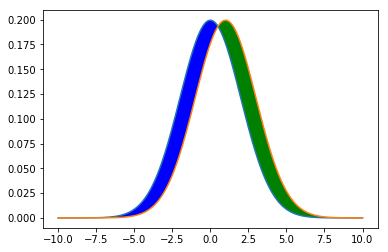

In [9]:
import matplotlib.pyplot as plt
x_axis = np.arange(-10, 10, 0.001)
# Mean = 0, SD = 2.
dist_a = stats.norm.pdf(x_axis,0,2)
# Mean = 1, SD = 2
dist_b = stats.norm.pdf(x_axis,1,2)
plt.plot(x_axis, dist_a)
plt.plot(x_axis, dist_b)
plt.fill_between(x_axis, dist_a, dist_b, where=dist_b>=dist_a, facecolor='green', interpolate=True)
plt.fill_between(x_axis, dist_a, dist_b, where=dist_b<=dist_a, facecolor='blue', interpolate=True)
plt.show()

In [10]:
actual = np.array([0.4, 0.6]) # actual number of red and blue balls
model1 = np.array([0.2, 0.8]) # numbers we got above in 10 samples
model2 = np.array([0.35, 0.65]) # numbers we got above for 100 samples

kl1 = (model1 * np.log(model1/actual)).sum()
print("Model 1: ", kl1)

kl2 = (model2 * np.log(model2/actual)).sum()
print("Model 2: ", kl2)


Model 1:  0.0915162218494
Model 2:  0.00529177256922
